In [4]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from matplotlib import gridspec as GS
from scipy import io as sio

from heatmaps import annotate_heatmap, heatmap

Fill in these variables before running the cells below:

In [7]:
correlation_matrix = "/Users/jon.clucas/C-PAC/scripts/benchmark_scripts/corrs.mat"
save_path = False # "{some/path}.png" or False

In [8]:
regressor_list = ['GS', 'CSF', 'WM', 'tCompCor0', 'aCompCor0', 'aCompCor1', 'aCompCor2', 'aCompCor3', 'aCompCor4'] 
motion_list = ['FD']
var_list = regressor_list + motion_list

# Change to your local path
corrs = sio.loadmat(correlation_matrix) 
corrs = corrs['corrs']
corrs = abs(np.transpose(corrs))

sub = range(25427,25457)
ses = [1,2]
sub_list = []

for i in sub:
  for j in ses:
      sub_list.append('sub-00'+str(i)+'_ses-'+str(j))

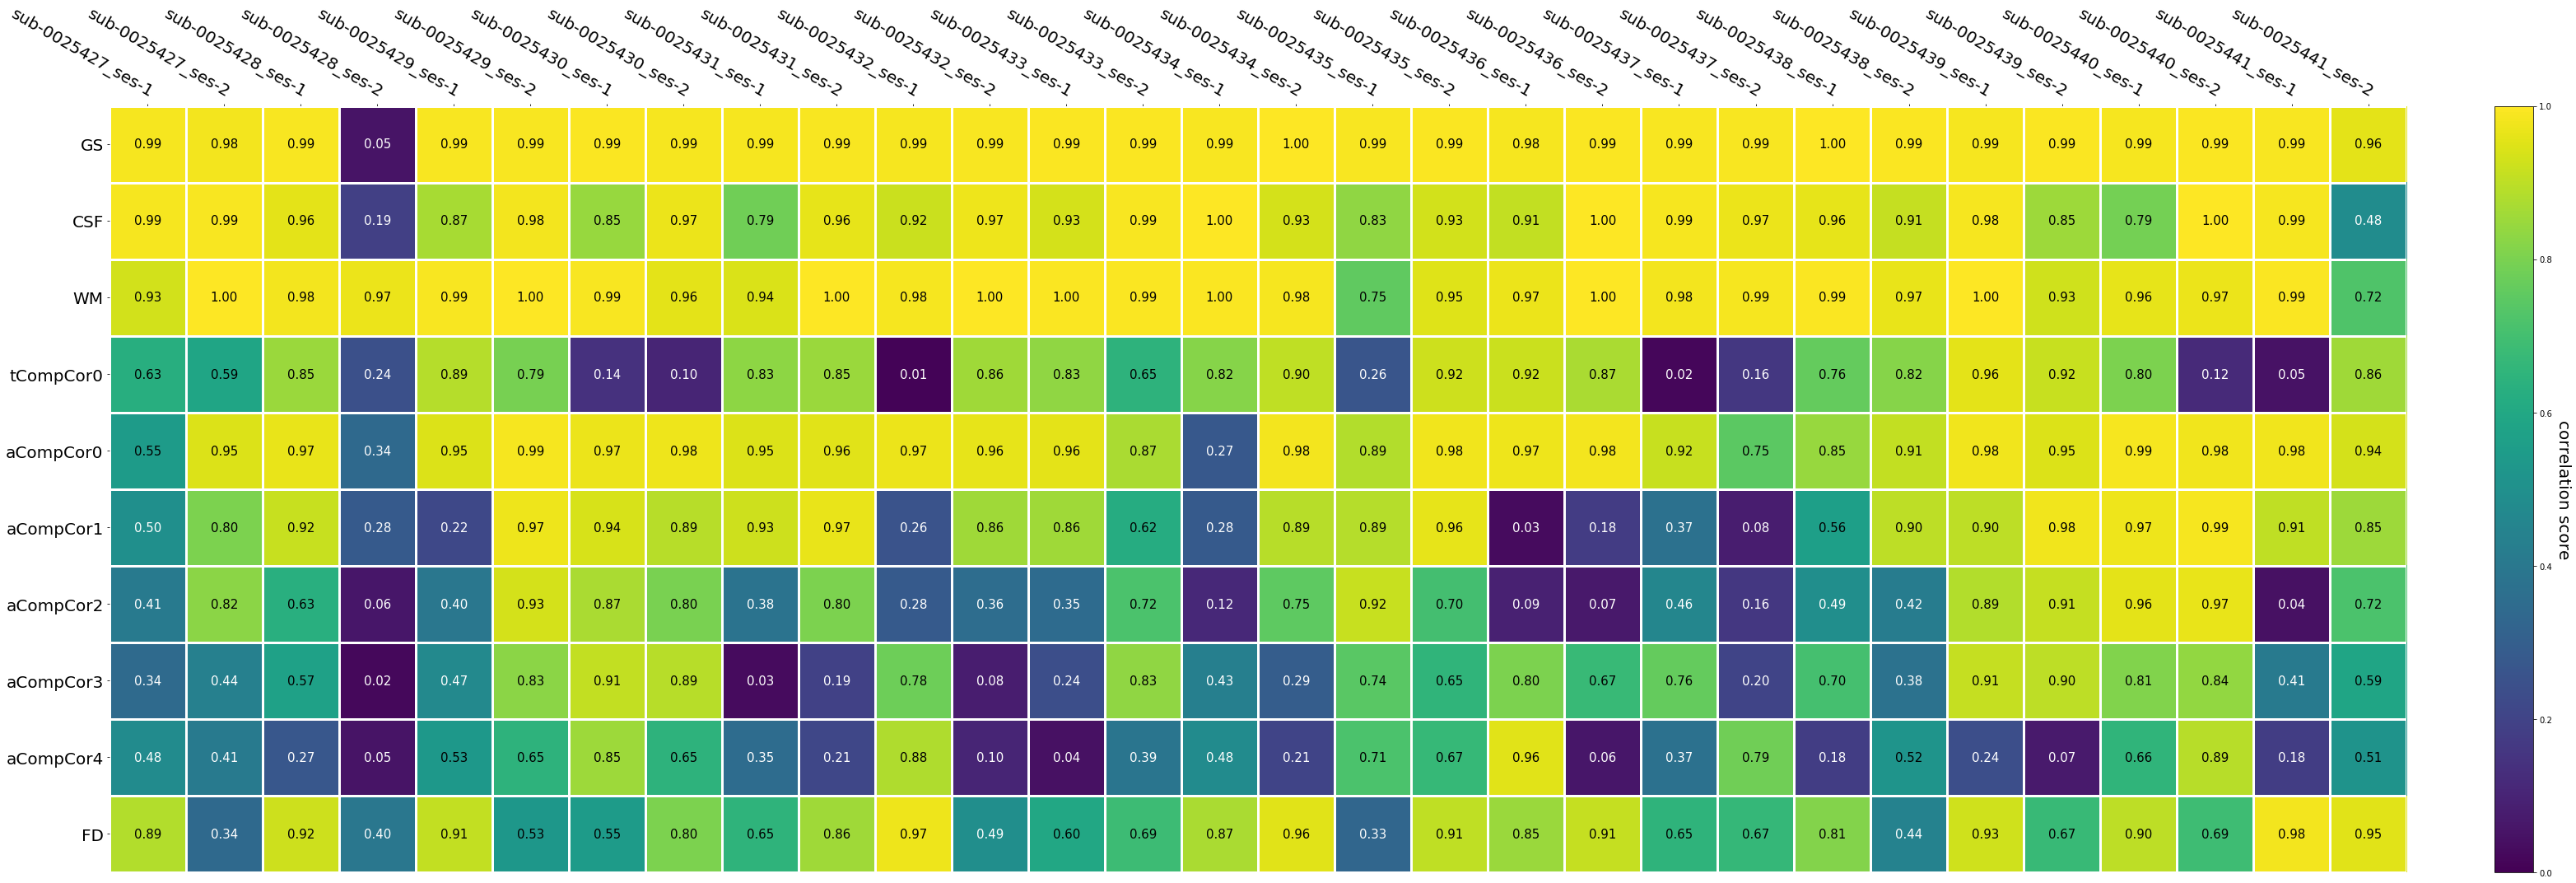

In [9]:
fig, ax = plt.subplots(figsize = (50, 15))
im, cbar = heatmap(
    corrs, var_list, sub_list, ax=ax, vmin=0, vmax=1,
    cbarlabel="correlation score"
)
texts = annotate_heatmap(im)
fig.tight_layout()

if save_path:
    plt.savefig(save_path)
plt.show()